In [1]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.linear_model import HuberRegressor
from utilities import train


In [2]:
X = pd.read_csv("data/X_train_NHkHMNU.csv")
y = pd.read_csv("data/y_train_ZAN5mwg.csv")
data = pd.merge(X, y, on="ID")
data

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,TARGET
0,1054,206,FR,0.210099,-0.427458,-0.606523,0.606523,NaN,0.692860,NaN,...,-0.172680,-0.556356,-0.790823,-0.283160,-1.069070,-0.063404,0.339041,0.124552,-0.002445,0.028313
1,2049,501,FR,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,...,-1.240300,-0.770457,1.522331,0.828412,0.437419,1.831241,-0.659091,0.047114,-0.490365,-0.112516
2,1924,687,FR,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,...,-0.480700,-0.313338,0.431134,0.487608,0.684884,0.114836,0.535974,0.743338,0.204952,-0.180840
3,297,720,DE,-0.983324,-0.849198,-0.839586,0.839586,-0.270870,0.563230,0.270870,...,-1.114838,-0.507570,-0.499409,-0.236249,0.350938,-0.417514,0.911652,-0.296168,1.073948,-0.260356
4,1101,818,FR,0.143807,-0.617038,-0.924990,0.924990,NaN,0.990324,NaN,...,-0.541465,-0.424550,-1.088158,-1.011560,0.614338,0.729495,0.245109,1.526606,2.614378,-0.071733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,459,809,DE,1.529204,1.106682,-1.855327,1.855327,-0.218658,1.450426,0.218658,...,NaN,NaN,NaN,NaN,NaN,NaN,0.876984,0.819520,1.320373,-0.172597
1490,1674,887,FR,1.618582,1.752840,0.611392,-0.611392,0.449153,-0.152146,-0.449153,...,NaN,NaN,NaN,NaN,NaN,NaN,0.932633,-0.085690,0.356356,-0.063546
1491,748,1083,DE,0.856399,0.489199,-0.255778,0.255778,-1.531544,-0.829568,1.531544,...,0.207905,0.404763,-0.594595,0.894011,0.256338,0.402316,-1.112899,-0.237835,0.067152,0.151797
1492,1454,1133,FR,0.560689,-0.343777,-0.830239,0.830239,-0.304856,1.210230,0.304856,...,-0.682815,-0.390304,-0.972088,-1.501930,1.215528,1.338708,0.962812,-5.392852,-0.843812,-0.640917


In [16]:
reg = HuberRegressor(epsilon=2, max_iter=1000, alpha=240)
train_results, test_results = train(reg, data, 5, combine_country_features=True)
train_results

5it [00:01,  4.00it/s]


[0.29446285559839436,
 0.29139568660751275,
 0.3089019775058245,
 0.28123449447342874,
 0.2530989284786473]

In [17]:
test_results

[0.2211698951763148,
 0.15984687195232614,
 0.15017599494691516,
 0.3184839846468093,
 0.32643864808608725]

In [18]:
sum(test_results) / len(test_results)

0.23522307896169053

In [21]:
X = data.drop(["TARGET", "ID", "DAY_ID"], axis=1)
X = pd.get_dummies(X)
features = ["CONSUMPTION", "GAS", "COAL", "HYDRO", "NUCLEAR", "SOLAR", "WINDPOW", "RESIDUAL_LOAD", "RAIN", "WIND", "TEMP"]
for feature in features:
    X[f"DELTA_{feature}"] = X[f"DE_{feature}"] - X[f"FR_{feature}"]
    X[f"SUM_{feature}"] = X[f"DE_{feature}"] + X[f"FR_{feature}"]
reg.feature_names_in_ = X.columns

In [27]:
for coef, val in sorted(list(zip(X.columns, reg.coef_)), key=lambda x: abs(x[1]), reverse=True):
    print(f"param: {coef}, value: {val:.4f}")

param: DE_NET_EXPORT, value: -0.0543
param: DE_NET_IMPORT, value: 0.0543
param: DE_FR_EXCHANGE, value: 0.0398
param: FR_DE_EXCHANGE, value: -0.0398
param: FR_WINDPOW, value: -0.0344
param: SUM_WINDPOW, value: -0.0324
param: DE_RESIDUAL_LOAD, value: 0.0324
param: CARBON_RET, value: 0.0286
param: DELTA_RESIDUAL_LOAD, value: 0.0243
param: DE_WINDPOW, value: -0.0238
param: SUM_RESIDUAL_LOAD, value: 0.0217
param: DE_SOLAR, value: -0.0196
param: SUM_SOLAR, value: -0.0191
param: FR_SOLAR, value: -0.0167
param: DE_COAL, value: -0.0160
param: DELTA_WINDPOW, value: 0.0157
param: FR_NUCLEAR, value: 0.0155
param: SUM_COAL, value: -0.0153
param: DELTA_NUCLEAR, value: -0.0151
param: COAL_RET, value: -0.0149
param: DELTA_GAS, value: -0.0135
param: DE_CONSUMPTION, value: -0.0129
param: DELTA_COAL, value: -0.0126
param: SUM_HYDRO, value: 0.0123
param: SUM_NUCLEAR, value: 0.0106
param: FR_COAL, value: -0.0097
param: SUM_CONSUMPTION, value: -0.0091
param: DE_HYDRO, value: 0.0085
param: DE_LIGNITE, value:

In [29]:
alphas = np.linspace(1, 500, 25)
epsilons = np.linspace(1, 3, 20)
models = [HuberRegressor(max_iter=1000, epsilon=epsilon, alpha=alpha) for epsilon in epsilons for alpha in alphas]

In [30]:
from tqdm import tqdm

results = [train(model, data, 5) for model in tqdm(models)]

5it [00:02,  2.33it/s] [00:00<?, ?it/s]
5it [00:01,  4.69it/s] [00:02<18:00,  2.17s/it]
5it [00:01,  4.40it/s] [00:03<12:53,  1.55s/it]
5it [00:01,  4.21it/s] [00:04<11:34,  1.40s/it]
5it [00:01,  4.01it/s] [00:05<11:11,  1.35s/it]
5it [00:01,  4.96it/s] [00:07<10:55,  1.32s/it]
5it [00:01,  4.24it/s] [00:08<10:12,  1.24s/it]
5it [00:00,  5.62it/s] [00:09<10:12,  1.24s/it]
5it [00:01,  3.96it/s] [00:10<09:19,  1.14s/it]
5it [00:01,  4.91it/s] [00:11<09:43,  1.19s/it]
5it [00:01,  3.29it/s]0 [00:12<09:32,  1.17s/it]
5it [00:01,  4.86it/s]0 [00:14<10:40,  1.31s/it]
5it [00:01,  3.70it/s]0 [00:15<10:08,  1.25s/it]
5it [00:00,  5.08it/s]0 [00:16<10:27,  1.29s/it]
5it [00:01,  4.89it/s]0 [00:17<09:52,  1.22s/it]
5it [00:00,  5.95it/s]0 [00:18<09:33,  1.18s/it]
5it [00:01,  4.15it/s]0 [00:19<08:57,  1.11s/it]
5it [00:01,  4.94it/s]0 [00:21<09:20,  1.16s/it]
5it [00:01,  4.82it/s]0 [00:22<09:03,  1.13s/it]
5it [00:01,  4.51it/s]0 [00:23<09:00,  1.12s/it]
5it [00:01,  4.77it/s]0 [00:24<09:00, 

In [39]:
df = pd.DataFrame(
    [
        dict(
                {
                    "train_result": sum(result[0]) / len(result[0]),
                    "test_result": sum(result[1]) / len(result[1]),
                },
                **model.get_params()
        )
        for result, model in zip(results, models)
    ]
)
df

,train_result,test_result,alpha,epsilon,fit_intercept,max_iter,tol,warm_start
0,0.283722,0.222302,1.000000,1.0,True,1000,0.00001,False
1,0.282359,0.221605,21.791667,1.0,True,1000,0.00001,False
2,0.281195,0.218670,42.583333,1.0,True,1000,0.00001,False
3,0.281645,0.217859,63.375000,1.0,True,1000,0.00001,False
4,0.281437,0.217105,84.166667,1.0,True,1000,0.00001,False
...,...,...,...,...,...,...,...,...
495,0.276277,0.232814,416.833333,3.0,True,1000,0.00001,False
496,0.275827,0.232755,437.625000,3.0,True,1000,0.00001,False
497,0.275381,0.232764,458.416667,3.0,True,1000,0.00001,False
498,0.274808,0.232542,479.208333,3.0,True,1000,0.00001,False


In [40]:
df["train_test_delta"] = df["train_result"] - df["test_result"]

/var/folders/1x/yrtkq1t524l6pz53mvdg298r0000gn/T/ipykernel_8843/3711505699.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sns.scatterplot(data=df.groupby("alpha")["alpha", "test_result"].agg("mean"), x="alpha", y="test_result")


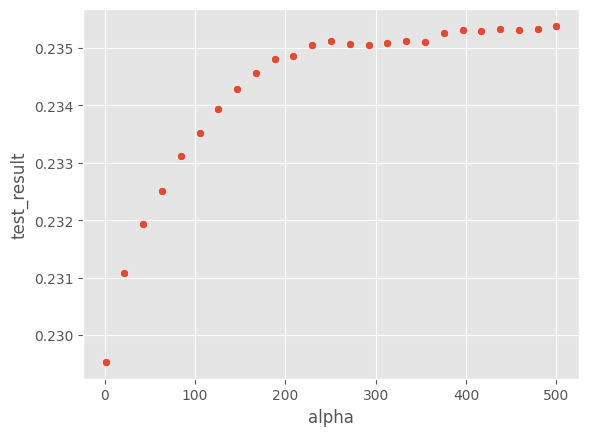

In [42]:
sns.scatterplot(data=df.groupby("alpha")["alpha", "test_result"].agg("mean"), x="alpha", y="test_result")
plt.show()

/var/folders/1x/yrtkq1t524l6pz53mvdg298r0000gn/T/ipykernel_8843/1409911643.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sns.scatterplot(data=df.groupby("epsilon")["epsilon", "test_result"].agg("mean"), x="epsilon", y="test_result")


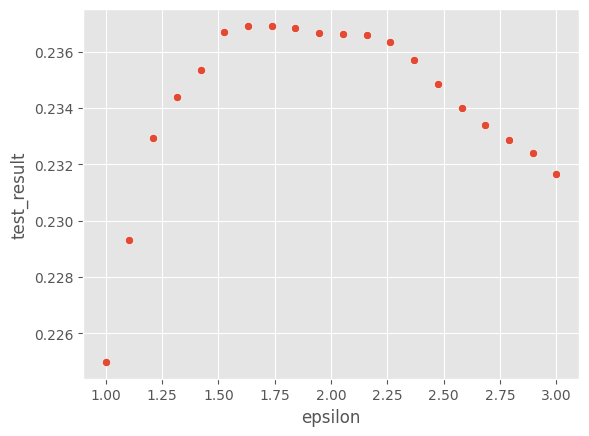

In [43]:
sns.scatterplot(data=df.groupby("epsilon")["epsilon", "test_result"].agg("mean"), x="epsilon", y="test_result")
plt.show()

In [46]:
df.nlargest(10, "test_result")

,train_result,test_result,alpha,epsilon,fit_intercept,max_iter,tol,warm_start,train_test_delta
272,0.277341,0.238285,458.416667,2.052632,True,1000,0.00001,False,0.039056
271,0.277843,0.238203,437.625000,2.052632,True,1000,0.00001,False,0.039640
184,0.283977,0.238149,188.125000,1.736842,True,1000,0.00001,False,0.045828
135,0.282793,0.238078,208.916667,1.526316,True,1000,0.00001,False,0.044715
133,0.283819,0.238075,167.333333,1.526316,True,1000,0.00001,False,0.045744
274,0.276363,0.238040,500.000000,2.052632,True,1000,0.00001,False,0.038323
157,0.284781,0.238034,146.541667,1.631579,True,1000,0.00001,False,0.046747
134,0.283247,0.238011,188.125000,1.526316,True,1000,0.00001,False,0.045235
132,0.284392,0.237990,146.541667,1.526316,True,1000,0.00001,False,0.046402
185,0.283504,0.237971,208.916667,1.736842,True,1000,0.00001,False,0.045533


0it [00:00, ?it/s]

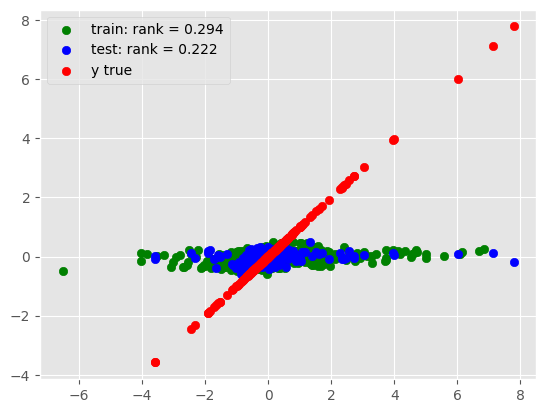

1it [00:00,  1.25it/s]

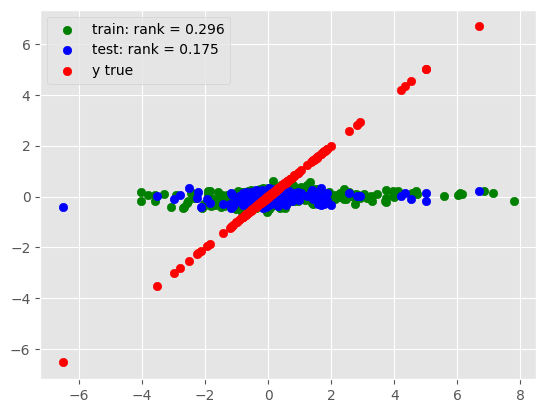

2it [00:01,  1.45it/s]

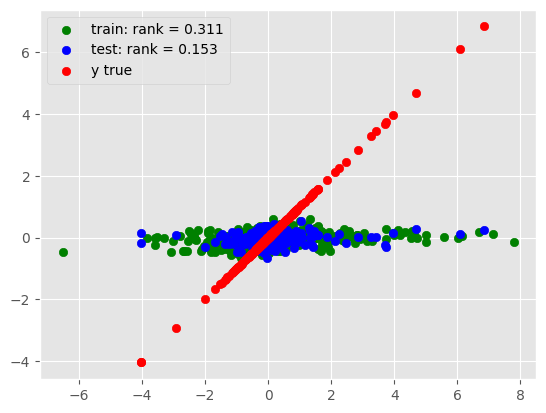

3it [00:02,  1.32it/s]

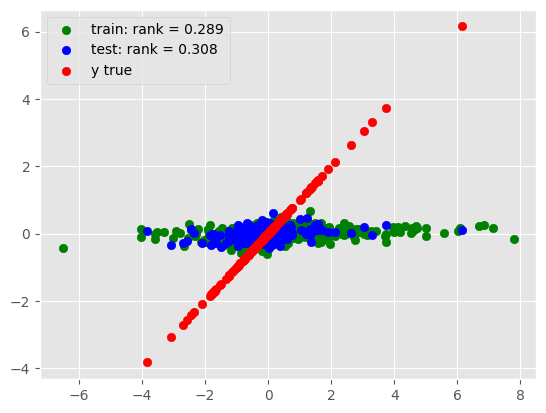

4it [00:02,  1.56it/s]

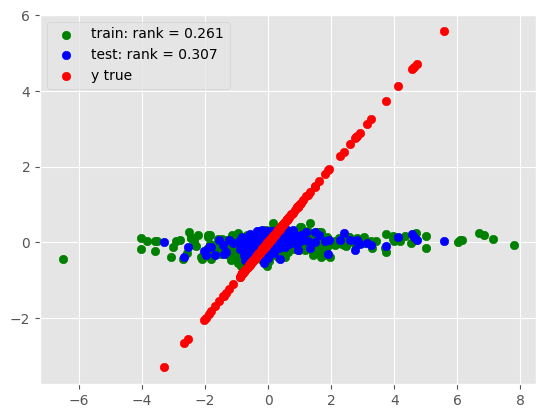

5it [00:03,  1.42it/s]


In [7]:
from sklearn.model_selection import KFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from tqdm import tqdm
from utilities import evaluate, preprocess

X, y = data.drop(["TARGET", "ID", "DAY_ID"], axis=1), data["TARGET"]
kf = KFold(n_splits=5, shuffle=True, random_state=42)
imputer = SimpleImputer()
scaler = StandardScaler()
combine_country_features = False

for train_idx, test_idx in tqdm(kf.split(data)):
    X_train, y_train = X.copy().loc[train_idx], y[train_idx]
    X_test, y_test = X.copy().loc[test_idx], y[test_idx]
    X_train = preprocess(X_train, imputer.fit_transform, scaler.fit_transform, combine_country_features=combine_country_features)
    X_test = preprocess(X_test, imputer.transform, scaler.transform, combine_country_features=combine_country_features)
    reg.fit(X_train, y_train)
    train_preds = reg.predict(X_train)
    train_rank = evaluate(train_preds, y_train)
    test_preds = reg.predict(X_test)
    test_rank = evaluate(test_preds, y_test)
    plt.scatter(y_train, train_preds, color="g", label=f"train: rank = {train_rank:.3f}")
    plt.scatter(y_test, test_preds, color="b", label=f"test: rank = {test_rank:.3f}")
    plt.scatter(y_test, y_test, color="r", label="y true")
    plt.legend()
    plt.show()

0it [00:00, ?it/s]

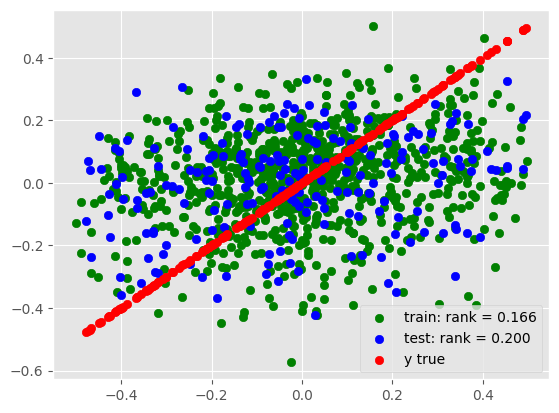

1it [00:01,  1.01s/it]

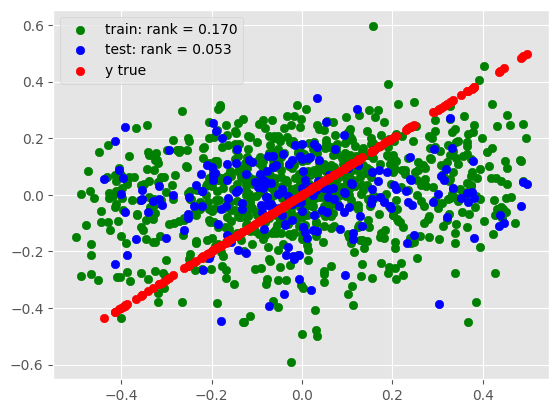

2it [00:01,  1.32it/s]

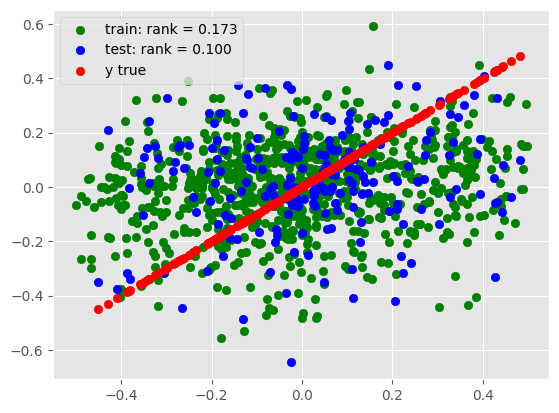

3it [00:02,  1.39it/s]

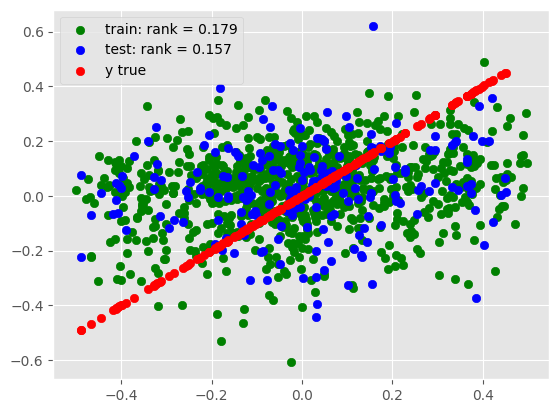

4it [00:03,  1.15it/s]

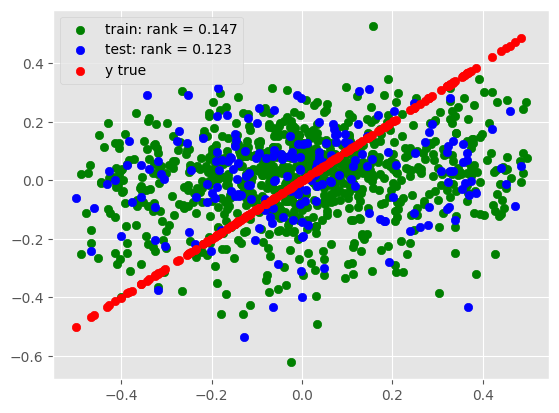

5it [00:04,  1.19it/s]


In [9]:
for train_idx, test_idx in tqdm(kf.split(data)):
    X_train, y_train = X.copy().loc[train_idx], y[train_idx]
    X_test, y_test = X.copy().loc[test_idx], y[test_idx]
    X_train = preprocess(X_train, imputer.fit_transform, scaler.fit_transform, combine_country_features=combine_country_features)
    X_test = preprocess(X_test, imputer.transform, scaler.transform, combine_country_features=combine_country_features)
    reg.fit(X_train, y_train)
    train_preds = reg.predict(X_train[abs(y_train) < 0.5])
    train_rank = evaluate(train_preds, y_train[abs(y_train) < 0.5])
    test_preds = reg.predict(X_test[abs(y_test) < 0.5])
    test_rank = evaluate(test_preds, y_test[abs(y_test) < 0.5])
    plt.scatter(y_train[abs(y_train) < 0.5], train_preds, color="g", label=f"train: rank = {train_rank:.3f}")
    plt.scatter(y_test[abs(y_test) < 0.5], test_preds, color="b", label=f"test: rank = {test_rank:.3f}")
    plt.scatter(y_test[abs(y_test) < 0.5], y_test[abs(y_test) < 0.5], color="r", label="y true")
    plt.legend()
    plt.show()


0it [00:00, ?it/s]

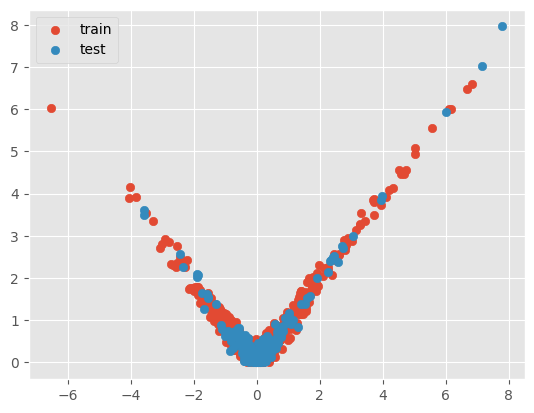

1it [00:14, 14.60s/it]

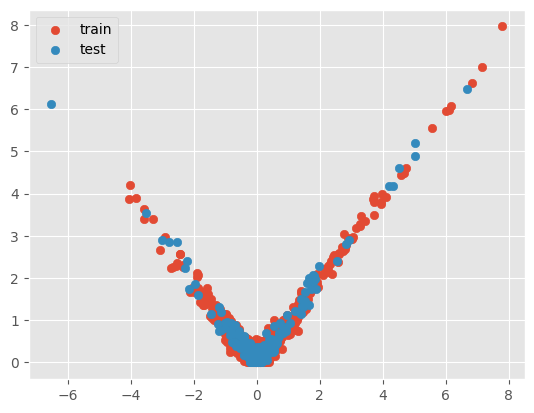

2it [00:26, 13.08s/it]

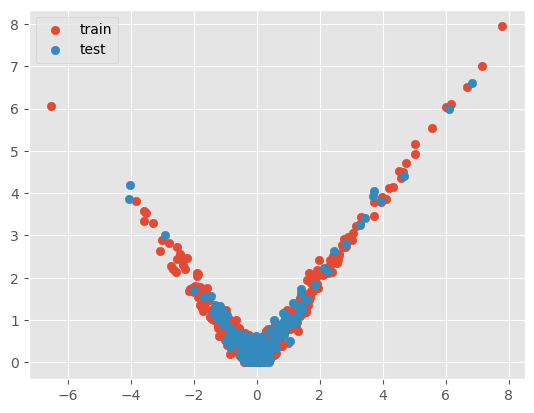

3it [00:39, 12.81s/it]

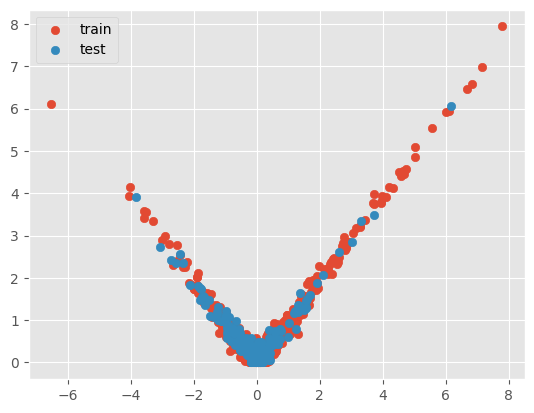

4it [00:46, 10.85s/it]

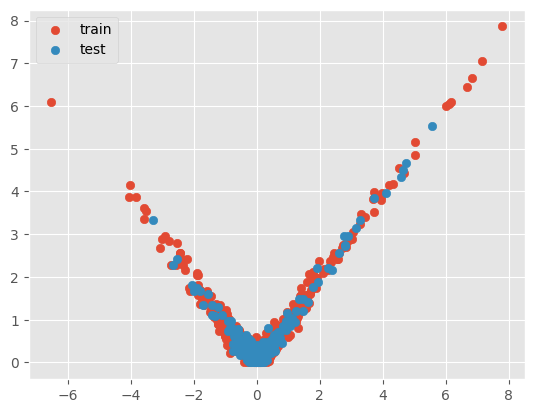

5it [00:57, 11.60s/it]


In [14]:
for train_idx, test_idx in tqdm(kf.split(data)):
    X_train, y_train = X.copy().loc[train_idx], y[train_idx]
    X_test, y_test = X.copy().loc[test_idx], y[test_idx]
    X_train = preprocess(X_train, imputer.fit_transform, scaler.fit_transform, combine_country_features=combine_country_features)
    X_test = preprocess(X_test, imputer.transform, scaler.transform, combine_country_features=combine_country_features)
    reg.fit(X_train, y_train)
    train_preds = reg.predict(X_train)
    train_rank = evaluate(train_preds, y_train)
    test_preds = reg.predict(X_test)
    test_rank = evaluate(test_preds, y_test)
    train_errors = abs(y_train - train_preds) 
    plt.scatter(y_train, train_errors, label="train")
    test_errors = abs(y_test - test_preds) 
    plt.scatter(y_test, test_errors, label="test")
    # hist, bins, patches = plt.hist(y_train, density=True, weights=train_errors, histtype="step", label="train")
    # plt.hist(y_test, bins=bins, density=True, weights=test_errors, histtype="step", label="test")
    plt.legend()
    plt.show()

In [15]:
reg.get_params()

{'alpha': 0.0001,
 'epsilon': 1.6,
 'fit_intercept': True,
 'max_iter': 1000,
 'tol': 1e-05,
 'warm_start': False}